In [1]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from get_homography import *
from stitch3 import *


In [11]:
img1=cv2.imread('images/mountain-left.jpg')
img2=cv2.imread('images/mountain-middle.jpg')
img3=cv2.imread('images/mountain-right.jpg')
# img1=cv2.imread('images/firewatch-left.jpg')
# img2=cv2.imread('images/firewatch-middle.jpg')
# img3=cv2.imread('images/firewatch-right.jpg')
# img1=cv2.imread('images/small-left.jpg')
# img2=cv2.imread('images/small-middle.jpg')
# img3=cv2.imread('images/small-right.jpg')
# img1=cv2.imread('images/web-left.jpg')
# img2=cv2.imread('images/web-middle.jpg')
# img3=cv2.imread('images/web-right.jpg')

HLM = get_homography(img1,img2)
HMR = get_homography(img2,img3)

5459
5468
Rmax1.4142135623730951
(489,)
(468,)
MaxInlierCount468
Final H[[ 1.13080462e+00 -5.46538891e-02 -1.65232911e+02]
 [ 1.10369955e-01  1.08234750e+00 -3.94268374e+00]
 [ 3.59893669e-04 -4.59411268e-05  1.00000000e+00]]
5468
5799
Rmax1.4142135623730951
(1232,)
(1221,)
MaxInlierCount1221
Final H[[ 1.12102917e+00 -1.23606057e-02 -1.52939733e+02]
 [ 6.18094729e-02  1.07166516e+00  8.08620725e+00]
 [ 3.30518185e-04 -4.99558972e-05  1.00000000e+00]]


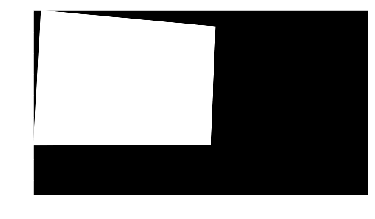

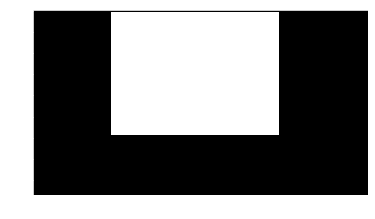

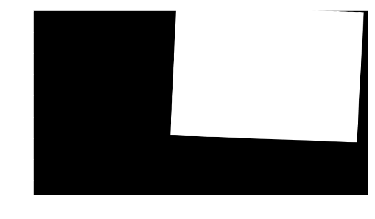

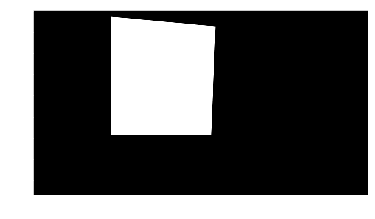

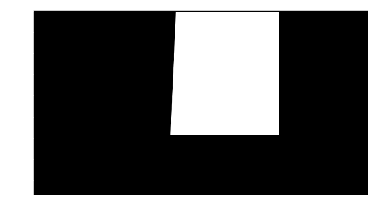

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


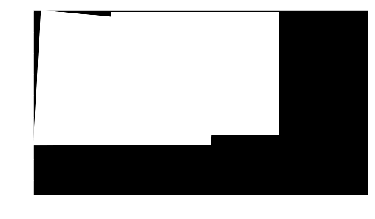

True

In [23]:
canvas = stitch3(img1,img2,img3,HLM,HMR)

cv2.imwrite("res.png",canvas)

In [4]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
canvas[:,:,0] = clahe.apply(canvas[:,:,0])
canvas[:,:,1] = clahe.apply(canvas[:,:,1])
canvas[:,:,2] = clahe.apply(canvas[:,:,2])
# canvas[:,:,0] = cv2.equalizeHist(canvas[:,:,0])
# canvas[:,:,1] = cv2.equalizeHist(canvas[:,:,1])
# canvas[:,:,2] = cv2.equalizeHist(canvas[:,:,2])